<a href="https://colab.research.google.com/github/selfor21/NN-Models/blob/main/04_RNN_Vanilla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RECURRENT NEURAL NETWORK - Vanilla


# 1- Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import SimpleRNN, Dense, Activation, Embedding, LSTM, Bidirectional
from keras.utils import pad_sequences
from keras.datasets import imdb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 3- IMDB Dataset

https://www.tensorflow.org/api_docs/python/tf/keras/datasets/imdb/load_data

In [2]:
(X_train,Y_train), (X_test, Y_test) = imdb.load_data(path = "imdb.npz",
                                    num_words = None,
                                    skip_top = 0,
                                    maxlen = None,
                                    seed = 113,
                                    start_char = 1,
                                    oov_char = 2,
                                    index_from = 3)

17464789/17464789 [==============================] - 0s 0us/step


In [3]:
print("X_train: ",X_train.shape)
print("Y_train: ",Y_train.shape)
print("X_test: ",X_test.shape)
print("Y_test: ",Y_test.shape)

print("Classes ", np.unique(Y_train))

X_train:  (25000,)
Y_train:  (25000,)
X_test:  (25000,)
Y_test:  (25000,)
Classes  [0 1]


In [4]:
unique,  cc = np.unique(Y_train, return_counts = True)
print("Class Distribution (train): ", dict(zip(unique,cc)))

Class Distribution (train):  {0: 12500, 1: 12500}


In [5]:
unique,  cc = np.unique(Y_test, return_counts = True)
print("Class Distribution (test): ", dict(zip(unique,cc)))

Class Distribution (test):  {0: 12500, 1: 12500}


## Reviews Examples

In [6]:
# obtenção do dicionário (id --> palavra)
dicionario = imdb.get_word_index()
num_words = len(dicionario)
print("Total number words : ", num_words)

1641221/1641221 [==============================] - 0s 0us/step
Total number words :  88584


In [ ]:
# Most 10 frequent  word
for (word, id) in dicionario.items():
  if id <= 10:
    print(id, word)


10 i
9 it
6 is
8 in
4 of
3 a
7 br
1 the
2 and
5 to


In [ ]:
def Decode(idx = 1):
    reverse_index = dict([(id,word) for (word, id) in dicionario.items()])
    sentenca = " ".join([reverse_index.get(i - 3, "!") for i in X_train[idx]])
    return sentenca

In [ ]:
# Exemplo de sentença (ids)
idx = 5
sentenca = Decode(idx)
print("Ids: ", np.array(X_train[idx])-3) # subtração do 3 - codificação inicial
print("Sentenca: ", sentenca)
print("Comprimento: ", len(X_train[idx]))
print("Classe: ", Y_train[idx])



Ids:  [   -2   775   125    71     9   627   160    12     1  1763  7979  1048
 43219    29    82   153    42    37   145   136   118   661   662     7
     7  1358   170     1   746 86585    13  3801     5     1   223    62
     9    40   124    21 15341     7     7]
Sentenca:  ! begins better than it ends funny that the russian submarine crew outperforms all other actors it's like those scenes where documentary shots br br spoiler part the message dechifered was contrary to the whole story it just does not mesh br br
Comprimento:  43
Classe:  0


# 4- Pré-processing 

Padding, dictionary reduction and embedding dimension

## 4.1- Configurations

In [ ]:
num_words_l=[5000, 5000, 5000, 5000, 5000, 1000, 5000, 10000, 5000, 5000, 5000, 5000]
max_len_l  =[ 100,  100,  100,  100,  100,  100,  100,   100,   50,  100,  150,  200]
embedding_l=[   8,   16,   32,   64,  128,   16,   16,    16,   16,   16,    16,  16]


## 4.2- Variables to save results

In [ ]:
results_l = []
history_loss = []
history_val_loss = []
history_acc = []
history_val_acc = []
parameters = []
#summary = []
test_accuracy = []
test_loss = []

# 5- Vanilla Model

In [ ]:
tamanho_config = len(num_words_l)

for i in range(tamanho_config):
  num_words = num_words_l[i]
  maxlen = max_len_l[i]
  embedding = embedding_l[i]

  (X_train,Y_train), (X_test, Y_test) = imdb.load_data(num_words = num_words)

  X_train = pad_sequences(X_train, maxlen = maxlen)
  X_test = pad_sequences(X_test, maxlen = maxlen)

  modelo = keras.Sequential()
  modelo.add(Embedding(num_words, embedding, input_length = len(X_train[0])))
  modelo.add(SimpleRNN(10, return_sequences = True))
  modelo.add(SimpleRNN(10, return_sequences = False))
  modelo.add(Dense(1, activation="sigmoid"))

  #Model training
  modelo.compile(loss = "binary_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])

  #Saving 
  param = modelo.count_params()
  print('Quantidade de parametros:', param)
  parameters.append(param)
  history = (modelo.fit(X_train, Y_train, validation_split=0.1, epochs = 10, batch_size = 128, verbose = 1))
  history_loss.append(history.history["loss"])
  history_val_loss.append(history.history["val_loss"])
  history_acc.append(history.history["accuracy"])
  history_val_acc.append(history.history["val_accuracy"])
  
  score = modelo.evaluate(X_test, Y_test)
  test_loss.append(round(score[0]*100,2))
  test_accuracy.append(round(score[1]*100,2))

  print("Acurácia final: %", score[1]*100)

## 5.1- Dataframe with accuracy of diferent configurations

In [ ]:
results_df = pd
results_df = pd.DataFrame(num_words_l, columns=['num_words'])
results_df['maxlen'] = max_len_l
results_df['embedding'] = embedding_l

results_df['test_acc'] = test_accuracy
results_df['parametros'] = parameters

results_df


,num_words,maxlen,embedding,test_acc,parametros
0,5000,100,8,82.19,40411
1,5000,100,16,77.76,80491
2,5000,100,32,80.44,160651
3,5000,100,64,81.12,320971
4,5000,100,128,81.27,641611
5,1000,100,16,82.05,16491
6,5000,100,16,80.45,80491
7,10000,100,16,79.79,160491
8,5000,50,16,75.88,80491
9,5000,100,16,79.42,80491


In [ ]:
results_df.to_csv('Resultados')

## 5.2 Avaliation

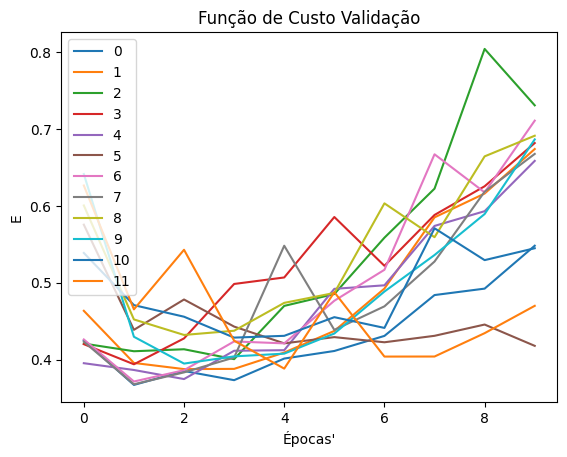

In [ ]:
plt.figure()

for i in range(tamanho_config):
  #plt.plot(history.history["loss"], label = "Treino")
  plt.plot(history_val_loss[i], label = i)
plt.title("Função de Custo Validação")
plt.ylabel("E")
plt.xlabel("Épocas'")
plt.legend()
plt.show()

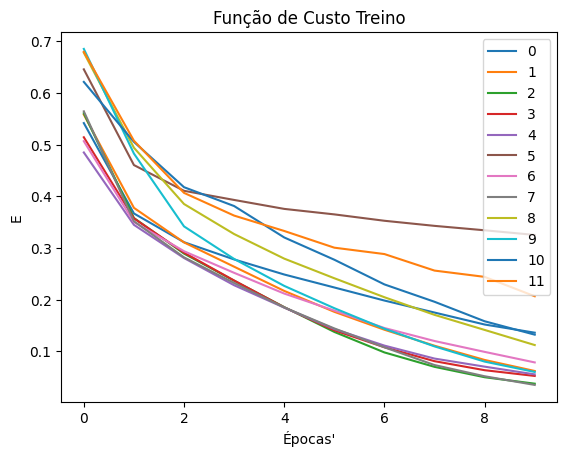

In [ ]:
plt.figure()

for i in range(tamanho_config):
  #plt.plot(history.history["loss"], label = "Treino")
  plt.plot(history_loss[i], label = i)
plt.title("Função de Custo Treino")
plt.ylabel("E")
plt.xlabel("Épocas'")
plt.legend()
plt.show()

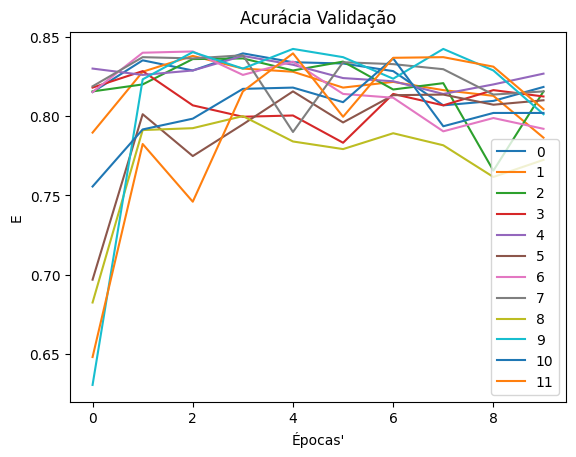

In [ ]:
plt.figure()

for i in range(tamanho_config):
  #plt.plot(history.history["loss"], label = "Treino")
  plt.plot(history_val_acc[i], label = i)
plt.title("Acurácia Validação")
plt.ylabel("E")
plt.xlabel("Épocas'")
plt.legend()
plt.show()